# Seaborn - Ejemplos Prácticos

**Docente:** Ariel Palazzesi
**Comisión:** 25261


In [22]:

# ============================
# Configuración inicial
# ============================
# Importamos Seaborn y Matplotlib.
import seaborn as sns
import matplotlib.pyplot as plt

# (Opcional) Ajuste estético general de Seaborn.
# set_theme aplica un estilo por defecto y paleta, facilitando una estética consistente.
# style: 'darkgrid' | 'whitegrid' | 'dark' | 'white' | 'ticks'
# palette: paletas predefinidas (p.ej. 'deep', 'muted', 'pastel', 'dark', 'colorblind', 'tab10', etc.)
sns.set_theme(style="whitegrid", palette="deep")

# Hacemos que las figuras se vean con buen tamaño por defecto.
plt.rcParams["figure.figsize"] = (8, 4.5)


## 1) Gráfico de barras - `sns.barplot()` (dataset: `tips`)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


/tmp/ipython-input-3554156181.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


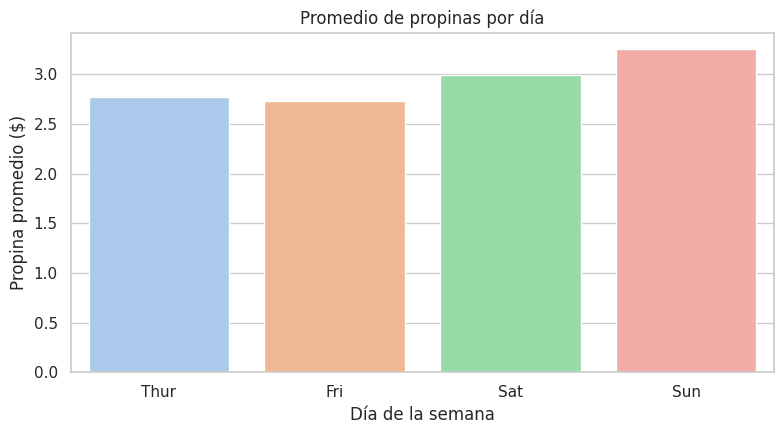

In [23]:

# Cargamos el dataset 'tips', que contiene información de propinas en un restaurante.
df = sns.load_dataset("tips")

# Miramos las primeras filas para conocer la estructura.
print(df.head())

# Gráfico de barras del promedio de propina por día.
sns.barplot(
    data=df,          # DataFrame que provee las columnas
    x="day",          # Eje X: variable categórica ('Thur', 'Fri', 'Sat', 'Sun')
    y="tip",          # Eje Y: variable numérica (monto de la propina)
    estimator="mean", # Función de agregación por grupo ('mean' por defecto). Alternativas: np.median, len, np.sum
    errorbar=None,    # Barras de error: 'sd' (desv. estándar), 'se' (error estándar), ('ci', 95), None
    palette="pastel"  # Paleta de colores. Alternativas: 'deep', 'muted', 'Set2', 'coolwarm', etc.
)
plt.title("Promedio de propinas por día")
plt.xlabel("Día de la semana")
plt.ylabel("Propina promedio ($)")
plt.tight_layout()    # Ajusta márgenes para evitar solapamientos
plt.show()


## 2) Gráfico de líneas - `sns.lineplot()` (dataset: `fmri`)

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


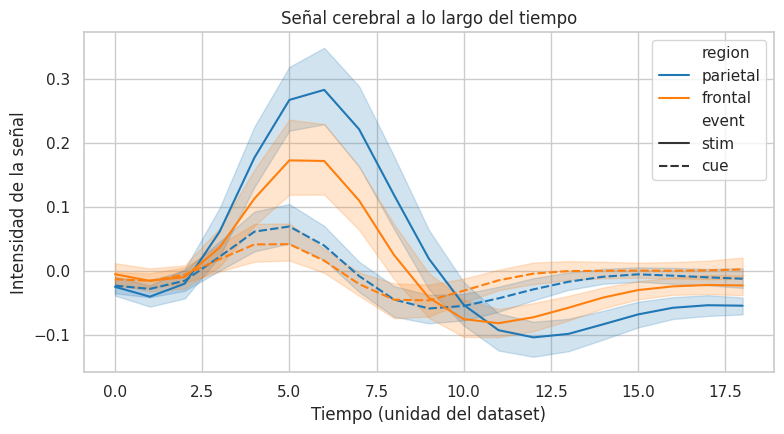

In [24]:

# Cargamos el dataset 'fmri', que contiene medidas de señal cerebral a lo largo del tiempo.
df = sns.load_dataset("fmri")
print(df.head())

# Gráfico de líneas de la señal por tiempo, diferenciando por 'region' (color) y 'event' (estilo de línea).
sns.lineplot(
    data=df,
    x="timepoint",    # Eje X: tiempo
    y="signal",       # Eje Y: intensidad de la señal
    hue="region",     # Color por región (p.ej. 'frontal', 'parietal')
    style="event",    # Estilo de línea por evento ('stim', 'cue'); alternativas: None, o usar 'dashes=False'
    markers=False,    # Si True, agrega marcadores en cada punto (útil con pocas observaciones)
    palette="tab10",  # Paleta de colores categórica
)
plt.title("Señal cerebral a lo largo del tiempo")
plt.xlabel("Tiempo (unidad del dataset)")
plt.ylabel("Intensidad de la señal")
plt.tight_layout()
plt.show()


## 3) Histograma - `sns.histplot()` (dataset: `penguins`)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


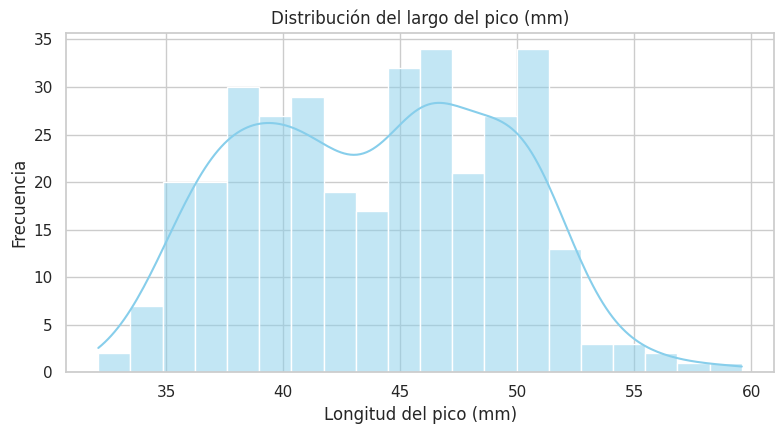

In [25]:

# Cargamos el dataset 'penguins', con medidas morfométricas de pingüinos.
df = sns.load_dataset("penguins")
print(df.head())

# Histograma de la longitud del pico.
sns.histplot(
    data=df,
    x="bill_length_mm", # Variable numérica a representar
    bins=20,            # Número de contenedores; o None (automático)
    kde=True,           # Dibuja la curva suave KDE. Alternativa: False (solo barras)
    color="skyblue",    # Color de las barras
    edgecolor="white"   # Borde de las barras (mejora legibilidad)
)
plt.title("Distribución del largo del pico (mm)")
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


## 4) Diagrama de cajas - `sns.boxplot()` (dataset: `penguins`)

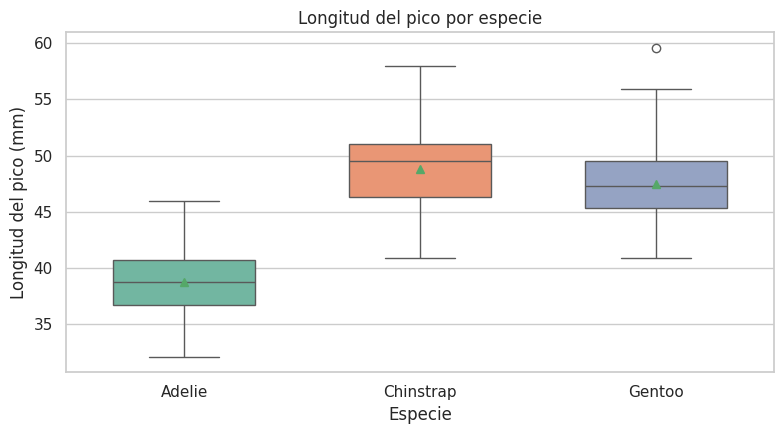

In [28]:

# Diagrama de cajas para comparar distribuciones de 'bill_length_mm' entre especies.
sns.boxplot(
    data=df,
    x="species",        # Variable categórica (Adelie, Chinstrap, Gentoo)
    hue="species",
    y="bill_length_mm", # Variable numérica
    palette="Set2",     # Paleta de colores
    width=0.6,          # Grosor de las cajas (0–1)
    showmeans=True      # Muestra el promedio como un símbolo adicional
)
plt.title("Longitud del pico por especie")
plt.xlabel("Especie")
plt.ylabel("Longitud del pico (mm)")
plt.tight_layout()
plt.show()

# Alternativas:
# - orient='h' para obtener orientación horizontal.
# - showfliers=False para ocultar outliers.
# - sns.violinplot(...) para ver distribución y densidad simultáneamente.


## 5) Dispersión - `sns.scatterplot()` (dataset: `penguins`)

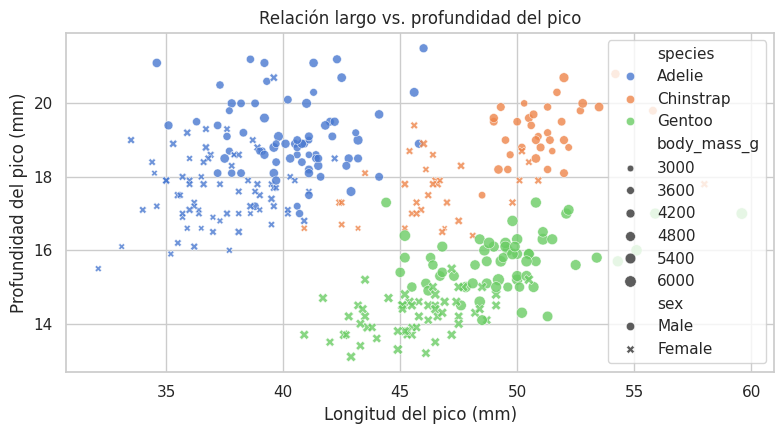

In [29]:

# Diagrama de dispersión relacionando largo y profundidad del pico, coloreado por especie.
sns.scatterplot(
    data=df,
    x="bill_length_mm",   # Eje X
    y="bill_depth_mm",    # Eje Y
    hue="species",        # Color por especie
    style="sex",          # Marcador por sexo (opcional)
    size="body_mass_g",   # Tamaño según masa corporal (opcional)
    alpha=0.8,            # Transparencia (0–1)
    palette="muted"       # Paleta de colores
)
plt.title("Relación largo vs. profundidad del pico")
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Profundidad del pico (mm)")
plt.tight_layout()
plt.show()

# Notas:
# - El uso de 'alpha' ayuda cuando hay muchos puntos superpuestos.
# - 'style' y 'size' son opcionales; quitarlos simplifica el gráfico.


## 6) Mapa de calor - `sns.heatmap()` (correlación con `penguins`)

In [ ]:

# Calculamos la matriz de correlación solo con columnas numéricas.
corr = df.corr(numeric_only=True)
print(corr)

# Mapa de calor de la matriz de correlación.
sns.heatmap(
    corr,
    annot=True,        # Escribe el valor en cada celda
    fmt=".2f",         # Formato numérico
    cmap="coolwarm",   # Escala de color. Alternativas: 'viridis', 'magma', 'YlGnBu', etc.
    linewidths=0.5,    # Líneas divisorias entre celdas
    square=True,       # Celdas cuadradas (estético)
    cbar_kws={"shrink": 0.8}  # Ajustes de la barra de color (reduce tamaño)
)
plt.title("Matriz de correlación (penguins)")
plt.tight_layout()
plt.show()

# Sugerencias:
# - center=0 centra la paleta en 0 (útil para correlaciones positivas/negativas).
# - vmin, vmax ajustan límites de la escala de color.



### ¿Cómo sigo investigando?

En una palabra, **experimentando!**

1. Elejí otro dataset de Seaborn (`sns.get_dataset_names()` lista disponibles).

2. Pensá en **dos** visualizaciones distintas para **una misma pregunta** analítica.

3. Configúralo para que se vea "lindo" con:
   - `title`, `xlabel`, `ylabel`
   - Usa parámetros clave (p. ej., `hue`, `style`, `bins`, `kde`, `errorbar`, etc.).

> Opcional: compará la legibilidad usando **paletas** diferentes.
